In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

plt.rcParams['font.family'] = 'DejaVu Sans'

In [2]:
# 1️⃣ Đọc dữ liệu từ file CSV
data_path = '../data/raw/vsa_food_rv_train.csv'
if not os.path.exists(data_path):
    raise FileNotFoundError(f"Không tìm thấy file dữ liệu: {data_path}")

df = pd.read_csv(data_path, encoding='utf-8')

print("✓ Đọc dữ liệu thành công từ", data_path)
print(f"Dataset có {len(df)} mẫu.")
print(f"Các cột: {df.columns.tolist()}")
print(f"\nMẫu dữ liệu đầu tiên:")
print(df.head())

✓ Đọc dữ liệu thành công từ ../data/raw/vsa_food_rv_train.csv
Dataset có 22847 mẫu.
Các cột: ['Comment', 'Rating']

Mẫu dữ liệu đầu tiên:
                                             Comment  Rating
0                                      Món ăn cực tệ     0.0
1  Mình thấy mọi người review tích cực nhưng thực...     0.0
2  Chắc với sinh viên thì ai cũng quen thuộc với ...     1.0
3  Nhiều hôm thèm lẩu riêu mà chỉ có một mình thì...     1.0
4  Không gian sạch sẽ.quán mới lên ra món hơi chậ...     1.0


In [3]:
# 2️⃣ Ánh xạ Rating thành nhãn và sentiment
# Rating 0.0 -> negative (0), Rating 1.0 -> positive (1) - ĐÃ SỬA
df['label'] = df['Rating'].apply(lambda x: 0 if x == 0.0 else 1)
df['sentiment'] = df['Rating'].apply(lambda x: 'negative' if x == 0.0 else 'positive')
df['review'] = df['Comment']  # Đổi tên cột để tương thích với code sau

print(f"Dataset có {len(df)} mẫu.")
print("\nPhân bố Rating:")
print(df['Rating'].value_counts())
print("\nPhân bố Sentiment:")
print(df['sentiment'].value_counts())
print(f"\n⚠️  Tỷ lệ mất cân bằng: {df['sentiment'].value_counts().max() / df['sentiment'].value_counts().min():.2f}:1")

Dataset có 22847 mẫu.

Phân bố Rating:
Rating
1.0    17351
0.0     5490
Name: count, dtype: int64

Phân bố Sentiment:
sentiment
positive    17357
negative     5490
Name: count, dtype: int64

⚠️  Tỷ lệ mất cân bằng: 3.16:1


✓ Lưu biểu đồ vào '../results/figures/exploration/eda_visualization.png'


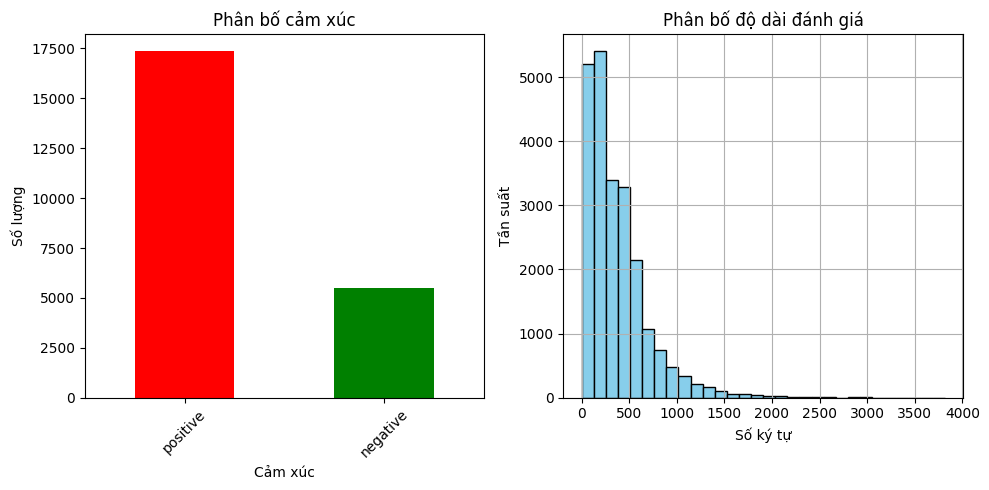

✓ Lưu dataset vào '../data/processed/reviews_with_labels.csv'

📊 Thống kê chi tiết:
- Tổng số mẫu: 22847
- Số mẫu positive: 17357
- Số mẫu negative: 5490
- Độ dài trung bình: 373 ký tự
- Độ dài min: 1.0 ký tự
- Độ dài max: 3814.0 ký tự


In [4]:
# 3️⃣ EDA: hiển thị mẫu và biểu đồ
plt.figure(num='eda', figsize=(10, 5))

# Biểu đồ phân bố cảm xúc
plt.subplot(1, 2, 1)
sentiment_counts = df['sentiment'].value_counts()
sentiment_counts.plot(kind='bar', color=['red', 'green'])
plt.title('Phân bố cảm xúc')
plt.xlabel('Cảm xúc')
plt.ylabel('Số lượng')
plt.xticks(rotation=45)

# Biểu đồ độ dài review
plt.subplot(1, 2, 2)
df['Comment'].str.len().hist(bins=30, color='skyblue', edgecolor='black')
plt.title('Phân bố độ dài đánh giá')
plt.xlabel('Số ký tự')
plt.ylabel('Tần suất')

# 4️⃣ Lưu biểu đồ
os.makedirs('../results/figures/exploration', exist_ok=True)
plt.tight_layout()
plt.savefig('../results/figures/exploration/eda_visualization.png', dpi=300, bbox_inches='tight')
print("✓ Lưu biểu đồ vào '../results/figures/exploration/eda_visualization.png'")

# Hiển thị biểu đồ
plt.show()

# 5️⃣ Lưu dataset dạng CSV
os.makedirs('../data/processed', exist_ok=True)
df.to_csv('../data/processed/reviews_with_labels.csv', index=False)
print("✓ Lưu dataset vào '../data/processed/reviews_with_labels.csv'")

# 6️⃣ Thống kê chi tiết
print("\n📊 Thống kê chi tiết:")
print(f"- Tổng số mẫu: {len(df)}")
print(f"- Số mẫu positive: {len(df[df['sentiment'] == 'positive'])}")
print(f"- Số mẫu negative: {len(df[df['sentiment'] == 'negative'])}")
print(f"- Độ dài trung bình: {df['Comment'].str.len().mean():.0f} ký tự")
print(f"- Độ dài min: {df['Comment'].str.len().min()} ký tự")
print(f"- Độ dài max: {df['Comment'].str.len().max()} ký tự")